Problem: we try to predict product ratings through applying some analysis to understand the data then building a model that fit the data well. 



input: features like price,	retail_price,	currency_buyer,	units_sold	uses_ad_boosts	rating,... ,merchant_rating_count



output: predict the product ratings
data mining function: Classification



challenges: how to choose the best model, how to choose the best group of features, tuning the models with the best set of parameters.



impact:  you can estimate how likely people will like your product, without actually listing out there.



ideal solution:	there is no one you have try until you reach the ideal one

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [2]:
#read_data
train = pd.read_csv('train_new.csv')

# Data Exploration

https://www.kdnuggets.com/2019/11/data-cleaning-preprocessing-beginners.html

In [3]:
# print top 5 rows
train.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [4]:
# explore information about train dateset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [5]:
train.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


In [6]:
#print frequency of each value in currency_buyer column
train['currency_buyer'].value_counts()

EUR    1094
Name: currency_buyer, dtype: int64

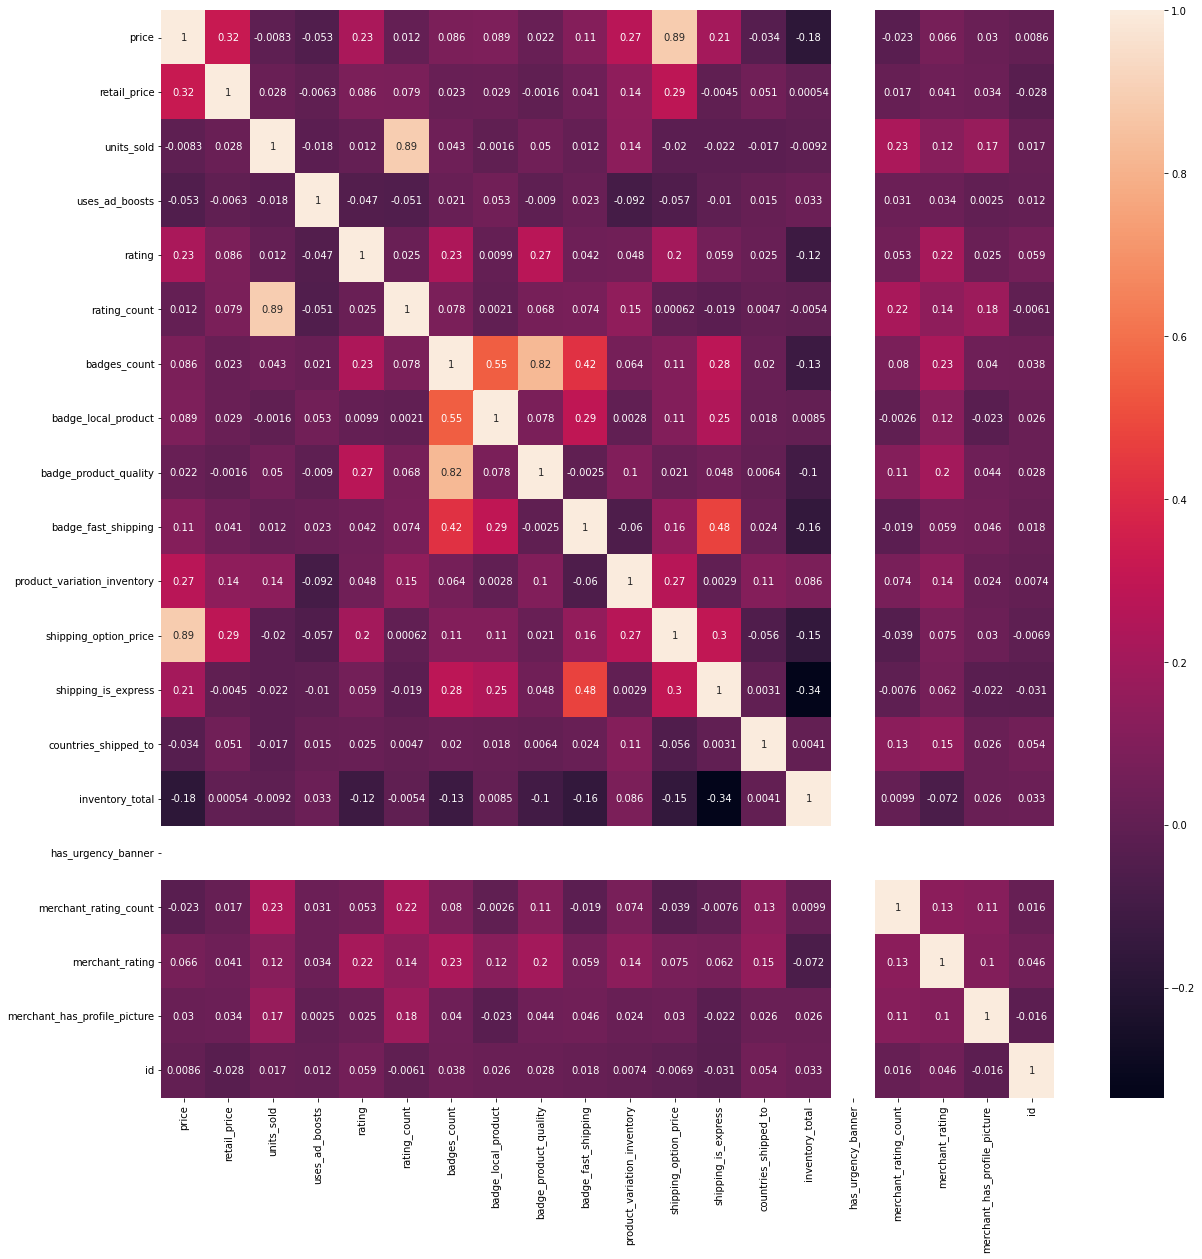

In [7]:
#create a heatmap to explore correlation between columns
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), annot=True)

In [8]:

fig = px.imshow(train.corr())
fig.show()

In [9]:
#frequency of each in rating column
train['rating'].value_counts()

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
6.0      1
Name: rating, dtype: int64

In [10]:
#drop out of range values
rating = [5.0,4.0, 3.0, 2.0, 1.0]
train = train[train['rating'].isin(rating)]

In [11]:
#checking range values
train['rating'].value_counts()

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
Name: rating, dtype: int64

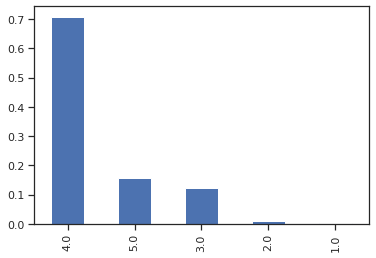

In [128]:
train['rating'].value_counts(normalize=True).plot(kind='bar')

In [12]:
#train columns
train.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'theme', 'crawl_month', 'id'],
      dtype='object')

most of the data below 15 euro

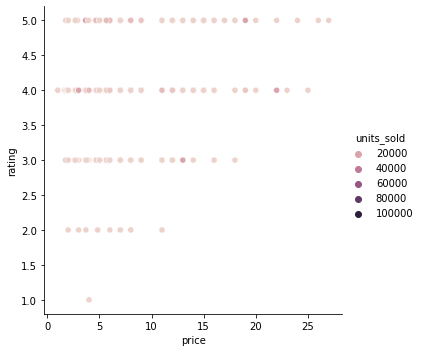

In [13]:
import seaborn as sns
sns.relplot(x="price", y="rating", hue="units_sold", data=train)

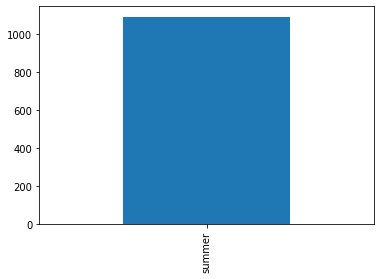

In [14]:
# value counts in theme column
train['theme'].value_counts().plot(kind='bar')

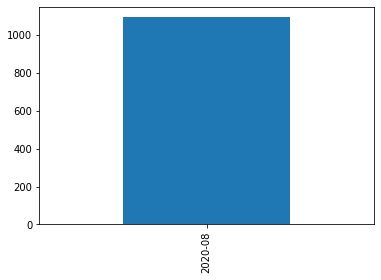

In [15]:
# value counts in crawl_month column
train['crawl_month'].value_counts().plot(kind='bar')

In [16]:
# value counts in merchant_info_subtitle column
train['merchant_info_subtitle'].value_counts()

86 % avis positifs (12,309 notes)    8
83 % avis positifs (32,168 notes)    7
85 % avis positifs (80,093 notes)    5
85 % avis positifs (5,264 notes)     5
84 % avis positifs (1,047 notes)     5
                                    ..
90 % avis positifs (2,359 notes)     1
90 % avis positifs (26,833 notes)    1
86 % avis positifs (4,335 notes)     1
79 % avis positifs (667 notes)       1
78 % avis positifs (6,632 notes)     1
Name: merchant_info_subtitle, Length: 807, dtype: int64

In [17]:
train['merchant_name'].value_counts()

greatexpectationstechnology              8
广州唯适唯服饰有限公司                              7
sangboostore                             6
shuilingjiaointernationaltradecompany    6
fengjinying                              6
                                        ..
wwenliping                               1
yourvogue                                1
caohongbo                                1
bumanke003                               1
oiug56465                                1
Name: merchant_name, Length: 745, dtype: int64

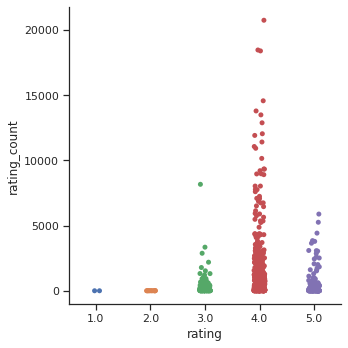

In [18]:

sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="rating", y="rating_count", data=train)

need to be drop because 97% of the values are CN so ther is no variation

In [19]:
train['origin_country'].value_counts(normalize=True)

CN    0.974098
US    0.020352
VE    0.002775
SG    0.001850
GB    0.000925
Name: origin_country, dtype: float64

less variation, the currency_buyer column has one value

In [20]:
train['currency_buyer'].value_counts()

EUR    1093
Name: currency_buyer, dtype: int64

In [21]:
train['shipping_option_name'].value_counts(normalize=True)

Livraison standard         0.957914
Standard Shipping          0.014639
Envio Padrão               0.005489
الشحن القياسي              0.003660
Expediere Standard         0.003660
Envío normal               0.002745
Standardversand            0.002745
Standardowa wysyłka        0.001830
Standart Gönderi           0.001830
Livraison Express          0.001830
Стандартная доставка       0.001830
Spedizione standard        0.000915
ការដឹកជញ្ជូនតាមស្តង់ដារ    0.000915
Name: shipping_option_name, dtype: float64

Pivot table

In [22]:
train['product_variation_size_id'].value_counts()

S           444
XS          248
M           135
XXS          76
L            29
           ... 
pants-S       1
XXXXL         1
SIZE-XXS      1
1pc           1
H01           1
Name: product_variation_size_id, Length: 83, dtype: int64

pivot table

In [23]:
train['product_color'].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentg

# Data Preprocessing

### dealing with missing values

In [24]:
# drop duplicates (if any)
train.drop_duplicates(inplace=True)

In [25]:
# missing values per-column
train.isnull().sum().sort_values(ascending=False)

merchant_profile_picture        923
has_urgency_banner              744
urgency_text                    744
product_color                    29
origin_country                   12
product_variation_size_id        12
merchant_name                     4
price                             0
merchant_title                    0
merchant_info_subtitle            0
countries_shipped_to              0
merchant_rating_count             0
merchant_rating                   0
merchant_id                       0
merchant_has_profile_picture      0
theme                             0
crawl_month                       0
inventory_total                   0
shipping_is_express               0
retail_price                      0
shipping_option_price             0
shipping_option_name              0
product_variation_inventory       0
tags                              0
badge_fast_shipping               0
badge_product_quality             0
badge_local_product               0
badges_count                

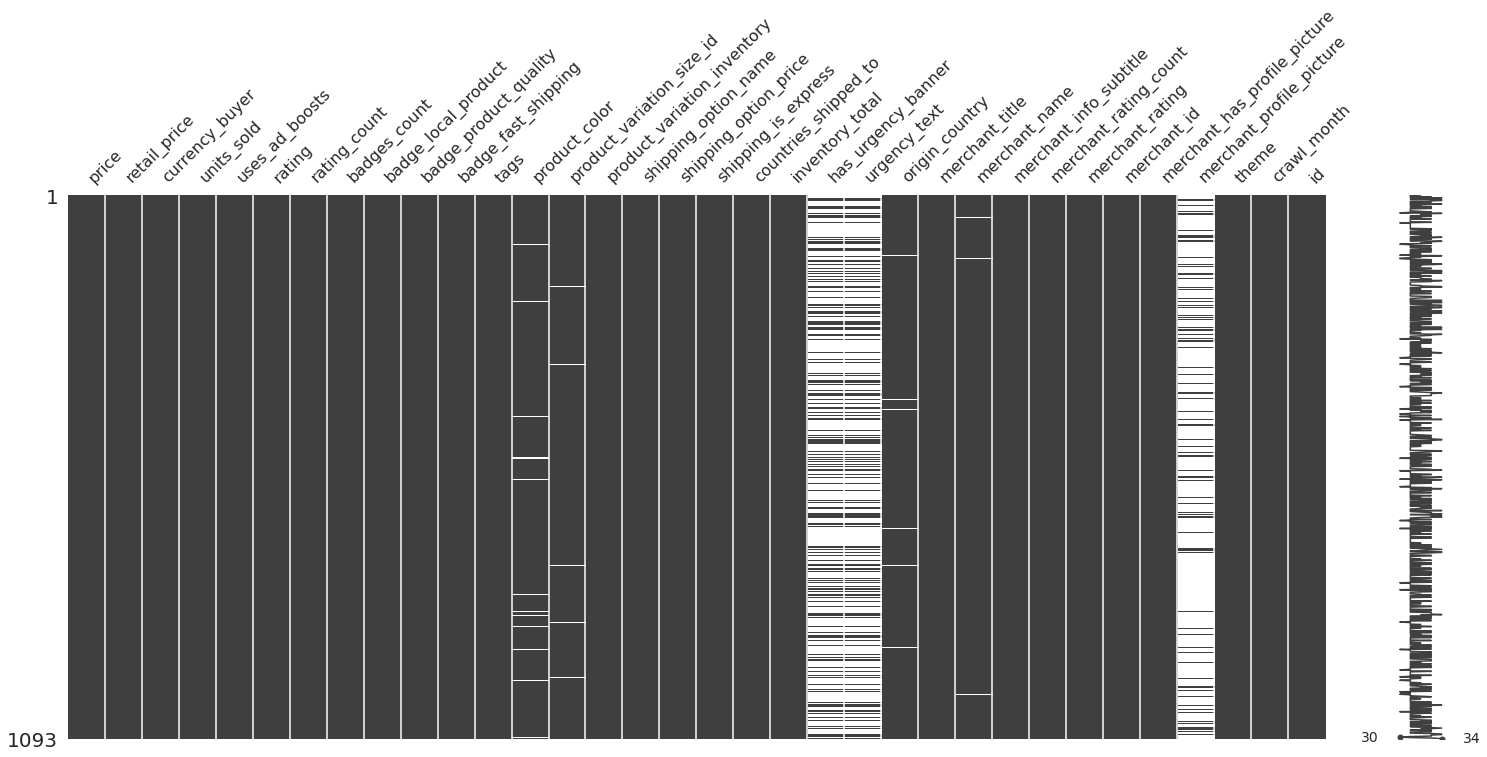

In [26]:
import missingno as msno
msno.matrix(train)
plt.show()

No variation in the columns either one value in a column or one value dominate the others

In [27]:
train.drop(['theme', 'crawl_month','currency_buyer'], axis=1, inplace=True)

drop id, column becuase they have no meaning or irrelevant

In [28]:
# show columns that start with "merchant"
print(train.loc[:,train.columns.str.startswith("merchant")].columns.values)

['merchant_title' 'merchant_name' 'merchant_info_subtitle'
 'merchant_rating_count' 'merchant_rating' 'merchant_id'
 'merchant_has_profile_picture' 'merchant_profile_picture']


In [29]:
#drop columns
train.drop(['merchant_info_subtitle', 'merchant_title', 'merchant_name', 'merchant_has_profile_picture'],axis=1,inplace=True)

drop columns with null values

In [30]:
train.isnull().sum()

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   29
product_variation_size_id       12
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
has_urgency_banner             744
urgency_text                   744
origin_country                  12
merchant_rating_count            0
merchant_rating                  0
merchant_id                      0
merchant_profile_picture       923
id                               0
dtype: int64

In [31]:
# drop columns
train.drop(['merchant_profile_picture','urgency_text','has_urgency_banner'], axis=1, inplace=True)

high correlation so they should be dropped

In [32]:
# impute missing values with "unknown"
train.fillna("unknown", inplace=True)

badge columns

In [33]:
# show columns that start with "badge"
train.loc[:,train.columns.str.startswith('badge')].columns

Index(['badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping'],
      dtype='object')

In [34]:
#change data type of badge columns
train[['badge_local_product', 'badge_product_quality','badge_fast_shipping']] = train[['badge_local_product', 'badge_product_quality','badge_fast_shipping']].astype(str)

In [35]:
#create a copy of orignal data
eda_train = train.copy()

In [36]:
eda_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1093 non-null   float64
 1   retail_price                 1093 non-null   int64  
 2   units_sold                   1093 non-null   int64  
 3   uses_ad_boosts               1093 non-null   int64  
 4   rating                       1093 non-null   float64
 5   rating_count                 1093 non-null   int64  
 6   badges_count                 1093 non-null   int64  
 7   badge_local_product          1093 non-null   object 
 8   badge_product_quality        1093 non-null   object 
 9   badge_fast_shipping          1093 non-null   object 
 10  tags                         1093 non-null   object 
 11  product_color                1093 non-null   object 
 12  product_variation_size_id    1093 non-null   object 
 13  product_variation_

In [37]:
#replace country code with its name 
eda_train.origin_country = eda_train.origin_country.str.replace( 'CN',"China" )
eda_train.origin_country = eda_train.origin_country.str.replace( "US","United States of America" )
eda_train.origin_country = eda_train.origin_country.str.replace( "unknown","unknown" )
eda_train.origin_country = eda_train.origin_country.str.replace( "VE","Venezuela" )
eda_train.origin_country = eda_train.origin_country.str.replace( 'GB',"Great Britain" )
eda_train.origin_country = eda_train.origin_country.str.replace( 'SG',"Singapore" )
eda_train.origin_country = eda_train.origin_country.str.replace( 'AT',"Austria" )

drop id column because it has no meaning 

In [38]:
# create a pie plot of country name and
#how many time it occurred in data
labels = eda_train.origin_country.value_counts(normalize=True).index.values

values  = eda_train.origin_country.value_counts().values


fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values))
fig.update_layout(title="Country of Origin of Product in Wish", legend_title="Countries", template="plotly_dark")

In [39]:
# create discounted_price column 
#by subtracting retail_price from price
eda_train['discounted_price'] = eda_train['retail_price'] - eda_train['price']
prices_by_country = eda_train[['price','discounted_price','retail_price','origin_country']].groupby('origin_country').mean()

In [40]:
fig = go.Figure()

fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.price, name="Price"))
fig.add_trace(go.Scatter(x=prices_by_country.index.values, y=prices_by_country.discounted_price, name="Discounted Price"))
fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.retail_price, name="Retail Price"))
fig.update_layout(title="Prices Categories By Country", xaxis_title="Countries", yaxis_title="Avg Discount Prices", template="plotly_dark", legend_title="Legend")

In [41]:
#description of prices from china
eda_train[eda_train.origin_country=="China"]['price'].describe()

count    1053.000000
mean        8.305660
std         3.851589
min         1.000000
25%         5.840000
50%         8.000000
75%        11.000000
max        27.000000
Name: price, dtype: float64

In [42]:
eda_train.loc[:,eda_train.columns.str.startswith('shipping')].columns

Index(['shipping_option_name', 'shipping_option_price', 'shipping_is_express'], dtype='object')

In [43]:
eda_train['shipping_option_price'].value_counts()

2    417
3    370
1    222
4     49
5     23
6      8
7      4
Name: shipping_option_price, dtype: int64

In [44]:
#plot shipping_option_price regarding Livraison standard shipping_option_name
livrasion_prices = eda_train[eda_train.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().index.values
livrasion_prices_frquency = eda_train[eda_train.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().values

fig = go.Figure()
fig.add_trace(go.Pie(labels=livrasion_prices, values=livrasion_prices_frquency))
fig.update_layout(title="Livrasion Standard Prices", legend_title="Prices In Euros", template="plotly_dark")

In [45]:
eda_train.loc[:,eda_train.columns.str.startswith("product")].columns

Index(['product_color', 'product_variation_size_id',
       'product_variation_inventory'],
      dtype='object')

# Preprocessing

In [46]:
preprocessed_train = eda_train.copy()

In [47]:
preprocessed_train.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'origin_country',
       'merchant_rating_count', 'merchant_rating', 'merchant_id', 'id',
       'discounted_price'],
      dtype='object')

columns with id have no useful information and maybe confuse the algorithm

In [48]:
#drop columns with id
preprocessed_train.drop(['merchant_id', 'id'], axis=1, inplace=True)

shipping_option_name, origin_country have one value that dominate about 96% of values in tow colulmns

In [49]:
preprocessed_train.drop(['shipping_option_name', 'origin_country'], axis=1, inplace=True)

In [50]:
model_train_df = preprocessed_train.copy()

the high value is dominating low value, fix this issue using Oversampling

In [51]:
bag_of_words = ['summer',
 "women's fashion",
 'fashion',
 'women',
 'casual',
 'plus size',
 'sleeveless',
 'dress',
 'shorts',
 'tops',
 'sexy',
 'beach',
 'sleeve',
 'short sleeves',
 'print',
 'shirt',
 'tank',
 'necks',
 'v-neck',
 'printed']

In [52]:
for word in bag_of_words:
    preprocessed_train["tag_"+word] = preprocessed_train.tags.str.lower().str.contains(word).astype(int).astype(str)

In [53]:
preprocessed_train.drop('tags',axis=1,inplace=True)

In [54]:
preprocessed_train.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'merchant_rating_count', 'merchant_rating',
       'discounted_price', 'tag_summer', 'tag_women's fashion', 'tag_fashion',
       'tag_women', 'tag_casual', 'tag_plus size', 'tag_sleeveless',
       'tag_dress', 'tag_shorts', 'tag_tops', 'tag_sexy', 'tag_beach',
       'tag_sleeve', 'tag_short sleeves', 'tag_print', 'tag_shirt', 'tag_tank',
       'tag_necks', 'tag_v-neck', 'tag_printed'],
      dtype='object')

In [55]:
#drop product_color column 
preprocessed_train.drop(['product_color'], axis=1, inplace=True)

In [56]:
# drop 'discounted_price' column as it ctreated from price and retail_price columns
preprocessed_train.drop(['discounted_price'], axis=1, inplace=True)

In [57]:
# drop product_variation_size_id column
preprocessed_train.drop(['product_variation_size_id'], axis = 1, inplace=True)

https://www.kaggle.com/nibukdk93/summer-sales-wish-acc-100/notebook

In [58]:
dependent_classes_labels= preprocessed_train.rating.value_counts().index.values
dependent_classes_values = preprocessed_train.rating.value_counts().values
fig = go.Figure()
fig.add_trace(go.Pie(labels=dependent_classes_labels, values=dependent_classes_values))
fig.update_layout(title="Imbalances in Dependent Classes", legend_title="Target Classes", template="plotly_dark")

In [59]:
model_train_df = preprocessed_train.copy()

In [60]:
final_df_dummified = pd.get_dummies(model_train_df, drop_first=True)
final_df_dummified['rating'] = model_train_df['rating']

In [61]:
X = final_df_dummified.loc[:,final_df_dummified.columns!='rating']
y= final_df_dummified['rating']

In [62]:
y.head()

0    4.0
1    4.0
2    4.0
3    3.0
4    4.0
Name: rating, dtype: float64

In [63]:
X.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'merchant_rating_count', 'merchant_rating', 'badge_local_product_1',
       'badge_product_quality_1', 'badge_fast_shipping_1', 'tag_summer_1',
       'tag_women's fashion_1', 'tag_fashion_1', 'tag_women_1', 'tag_casual_1',
       'tag_plus size_1', 'tag_sleeveless_1', 'tag_dress_1', 'tag_shorts_1',
       'tag_tops_1', 'tag_sexy_1', 'tag_beach_1', 'tag_sleeve_1',
       'tag_short sleeves_1', 'tag_print_1', 'tag_shirt_1', 'tag_tank_1',
       'tag_necks_1', 'tag_v-neck_1', 'tag_printed_1'],
      dtype='object')

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
sm = SMOTE(random_state=42, k_neighbors=1)

X_res,y_res = sm.fit_resample(X,y)

In [66]:
y_res.value_counts()

4.0    774
3.0    774
5.0    774
2.0    774
1.0    774
Name: rating, dtype: int64

In [68]:
drop_test_columns = ['product_color','tags','shipping_option_name', 'origin_country','merchant_id', 'id','merchant_profile_picture','urgency_text','has_urgency_banner',
                     'merchant_info_subtitle', 'merchant_title', 'merchant_name', 'merchant_has_profile_picture','theme', 'crawl_month','currency_buyer', 'product_variation_size_id'
                     ]

In [69]:
#test data
test = pd.read_csv('test_new.csv')

In [70]:
test1 = test.copy()

In [71]:
test1[['badge_local_product', 'badge_product_quality','badge_fast_shipping']] = test1[['badge_local_product', 'badge_product_quality','badge_fast_shipping']].astype(str)

In [72]:
for word in bag_of_words:
    test1["tag_"+word] = test1.tags.str.lower().str.contains(word).astype(int).astype(str)

In [73]:
test1.drop(drop_test_columns, axis=1, inplace=True)

In [74]:
test1 = pd.get_dummies(test1, drop_first=True)

In [75]:
test1.shape, X_res.shape

((479, 36), (3870, 36))

In [76]:
X_res.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'merchant_rating_count', 'merchant_rating', 'badge_local_product_1',
       'badge_product_quality_1', 'badge_fast_shipping_1', 'tag_summer_1',
       'tag_women's fashion_1', 'tag_fashion_1', 'tag_women_1', 'tag_casual_1',
       'tag_plus size_1', 'tag_sleeveless_1', 'tag_dress_1', 'tag_shorts_1',
       'tag_tops_1', 'tag_sexy_1', 'tag_beach_1', 'tag_sleeve_1',
       'tag_short sleeves_1', 'tag_print_1', 'tag_shirt_1', 'tag_tank_1',
       'tag_necks_1', 'tag_v-neck_1', 'tag_printed_1'],
      dtype='object')

In [77]:
test.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'theme', 'crawl_month', 'id'],
      dtype='object')

In [78]:
X_res.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,badge_local_product_1,badge_product_quality_1,badge_fast_shipping_1,tag_summer_1,tag_women's fashion_1,tag_fashion_1,tag_women_1,tag_casual_1,tag_plus size_1,tag_sleeveless_1,tag_dress_1,tag_shorts_1,tag_tops_1,tag_sexy_1,tag_beach_1,tag_sleeve_1,tag_short sleeves_1,tag_print_1,tag_shirt_1,tag_tank_1,tag_necks_1,tag_v-neck_1,tag_printed_1
0,8.00,7,10000,1,1670,0,50,3,0,30,50,66644,4.137582,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0
1,8.00,7,1000,0,843,1,50,3,0,37,50,25752,4.256873,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,6.00,34,100,0,10,0,50,2,0,41,50,3897,3.928920,0,0,0,1,1,1,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
3,4.67,4,100,1,82,0,5,1,0,25,50,7497,4.079365,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,8.00,11,1000,0,127,0,50,3,0,15,50,173,4.306358,0,0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0


#Modelling

###trial 1

In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC()
cv_svm_1 = cross_val_score(svm, X_res, y_res, cv=5, scoring='accuracy')

In [80]:
cv_svm_1.mean()

0.4007751937984496

###trial 2

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
cv_dtree = cross_val_score(dtree, X_res, y_res, cv=5)

In [99]:
cv_dtree.mean()

0.8937984496124031

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_res, y_res)

DecisionTreeClassifier()

In [122]:
dtree_pred = dtree.predict(test1)

In [123]:
dtree_pred = pd.DataFrame(dtree_pred)
dtree_pred.rename(columns={0: 'rating'}, inplace=True)
dtree_pred['id'] = test['id']
dtree_pred.set_index('id', inplace=True)

In [124]:
dtree_pred['rating'].value_counts()

4.0    318
3.0     81
5.0     75
2.0      3
1.0      2
Name: rating, dtype: int64

In [105]:
dtree_pred.to_csv('sample_submission_new.csv')

In [89]:
dtree_pred['rating'].value_counts()

4.0    327
3.0     79
5.0     69
1.0      2
2.0      2
Name: rating, dtype: int64

After fine-tuning SVM hyperparamerters using gridsearch

In [ ]:
"""from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10],
              'gamma': [1, 0.1],
              'kernel': ['rbf','linear']}
#tree_param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[3,4,5]}
clf = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
clf.fit(X_train, y_train)
print(clf.best_params_)"""

###trial 3

Normalize data because most machine learning algorithms prefer data to be normally distributed

scaling training data improved the accuracy of the model because it scaled features to be on the same range

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

selected parameters and after scaling training data which improve performance 

In [96]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(C = 1000, gamma = 1e-3)
cv_svm = cross_val_score(svm, X_res_scaled, y_res, cv=5, scoring='accuracy')

In [97]:
cv_svm.mean()

0.892764857881137

In [108]:
from sklearn.svm import SVC

svm = SVC(C = 1000, gamma = 1e-3)
svm.fit(X_res_scaled, y_res)

SVC(C=1000, gamma=0.001)

In [109]:
test_scaled = scaler.transform(test1)
svm_pred = svm.predict(test_scaled)

In [110]:
svm_pred = pd.DataFrame(svm_pred)
svm_pred.rename(columns={0: 'rating'}, inplace=True)
svm_pred['id'] = test['id']
svm_pred.set_index('id', inplace=True)

In [111]:
svm_pred['rating'].value_counts()

4.0    170
3.0    153
5.0    105
2.0     44
1.0      7
Name: rating, dtype: int64

In [104]:
svm_pred.to_csv('sample_submission_new.csv')

###trial 4

selected parameters and but scaling training data doesn't improve performance that much

In [ ]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_param = {'criterion': ['gini','entropy'], 'max_depth': list(range(1,11)),'min_samples_split': list(range(2,11)), 'min_samples_leaf': list(range(1,11)), 'max_features': list(range(1,11))}
clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)'''

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion= 'gini', max_depth= 6)
cv_tree = cross_val_score(dtree, X_res, y_res, cv=5)

In [ ]:
cv_tree.mean()

###trial 5

[grid search for Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth= 4, max_features= 10, min_samples_leaf= 5, min_samples_split= 10)
cv = cross_val_score(dtree, X_res, y_res, cv=5, )

In [ ]:
cv.mean()

###trial 6

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

naive = GaussianNB(var_smoothing=1e-09)
cv_naive = cross_val_score(naive, X_res_scaled, y_res, cv=5)

In [ ]:
cv_naive.mean()

####convert predicted data from SVM algorithm to a dataframe

In [ ]:
svm.fit(X_res, y_res)

In [ ]:
svm_pred = svm.predict(test1)

In [87]:
#convert svm_pred to dataframe
pred = pd.DataFrame(dtree_pred)


In [88]:
#rename 0 column to rating to be representitive
pred.rename(columns={0: 'rating'}, inplace=True)
pred['id'] = test['id']

In [ ]:
#set id as an index
pred.set_index('id', inplace=True)

In [ ]:
#save svm_pred to csv file called sample_submission_new
pred.to_csv('sample_submission_new.csv')

I have sunmitted 6 times three of them results zero becuase of different rating format as it must be float but I converted it to int as it was asked in the overview, the other three gave me accuracy about 0.79916, two of them are decison tree with hyperparameter tuning (criterion= 'gini', max_depth= 6) lead to accuracy == .79, but after tuning SVM I found out that it superior Decision tree and with scaling training data it performs even better.    


answer questions 







####Why Data Mining is a misnomer? What is another preferred name?

because we are not mining for data but instead from the data to get insights.

preferred name: Knowledge discovery


####What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

1- collecting data and store it in a database

2- cleaning that data store it in a data warehouse for further analysis instead of changing original dataset

3- Task-relevant Data: where you pull part of data to perform some task on 
4- Data Mining: analyzing data and building dashboards that illustrate your analysis and maybe help decision maker to take the important decision

5- Pattern Evaluation: after completing data mining phase you need to test you hypothesis, whether to accept it or try something else

6- knowledge: where you conclude your analysis to something the decision maker or normal people can undersatnd  

####In data mining, what is the difference between prediction and categorization?

Prediction: is a supervised learning method where algorithms see previous labeled examples to be able to predict future ones can be divided into regression and classification

categorization: grouping data into different clusters without the need to see labeled examples. whether it is clustering or reducing dimension (PCA) 

####Why data science/machine learning is a bad idea in the context of information security?

1- using data science/machine learning involve using data which lead that a company may know information about users that they even don't know about themselves, without their permission

2- Attacks: Steeling the model, Backdoor/data poisoning which may lead to a serious damage if it is a self-driving car

3- AI systems designers choose the features, metrics, and analytics
structures of the models that enable designer to explore users data

####What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

confidentiality: Loss of confidentiality may lead to disclosure of:
1-Personal information
2-Proprietary information
3-Government classified information

integrity: Loss of integrity may lead to
1-Unauthorized transactions
2-Wrong execution of software
3-Corruption of data

availability: Loss of availability may lead to
1-Denial of Service
2-Loss of Data